In [ ]:
import csv

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib as plt

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn import metrics

In [9]:
os.chdir("/Users/JackVoigt/Documents/MSIA Files")

In [10]:
os.getcwd()

'/Users/JackVoigt/Documents/MSIA Files'

In [11]:
pd.set_option('display.max_columns', None)

### The KNN algorithm is a supervised machine learning algorithm that is designed to help us create "clusters", or groups, based on different features of observations in order to help us classify these observations. This algorithm creates clusters that look to group a certain amount, or "k" amount of observations into any given cluster, which can help us classify data. It is considered a lazy learning method because it does not have what is considered a training step in its development.

### Above we have imported all of our packages we commonly use. Different types of algorithms and models often times have certain types of data that work best within a specific model. The data that is most ideal for the KNN algorithm may not be as suitable for another method, but that is why we choose different methods for different types of data.

### There are a handful of criteria that are best suited and most ideal for a KNN algorithm analysis. One of these criteria is that the data is labeled. First, is that the data is labeled so it can be interpretted more effectively as well as classified. Another ideal characteristic of the data is that the data itself is not too "noisy", meaning that some of the values of the observations in our data are of high variety or cannot be interpretted logically, thus making them meaningless in our analysis. The less noisy, the better for the KNN. Another characteristic we hope to see in data used by the KNN algorithm is that our dataset is relatively small. Large data can cause for a complex KNN algorithm when we must create many differnt clusters on many features. 

### While the KNN algorithms focus is to classify observations much like some other methods, there are certain situations that favor the KNN over these other methods. A primary strength of the KNN algoritym is that is can perform classifcations of many different classes very effectively. Another situation in which is would be ideal to use the KNN is when you cannot be sure about the assumptions that need to be made for different models such as a linear regression model. These assumptions do not need to be made for the KNN algorithm. The KNN algorithm also works better than other methods when there are fewer features that play into the algorithm. An excessive amount, as touched on before, makes the classification more complex. 

### For this analysis, we need to select a dataset that meet these criteria and are suitable for classification. We will select a dataset that includes data that includes different features that help describe our observations, which in this case are an individual star. We will look to classify these stars based on the features and their values. The variable we will classify by is called "Type" which includes the levels 0 (red dwarf), 1 (brown dwarf), 2 (white dwarf), 3 (main sequence), 4 (Super Giants), and 5 (Hyper Giants). We can read in our dataset and run some exploratory functions to better understand what we are working with. This data was collected from https://www.kaggle.com/brsdincer/star-type-classification

In [12]:
stars = pd.read_csv("Stars.csv")

In [13]:
stars.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [14]:
stars.count

<bound method DataFrame.count of      Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]>

In [15]:
stars['Type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [16]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [17]:
stars['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Orange                  2
Whitish                 2
White-Yellow            1
Orange-Red              1
Pale yellow orange      1
Yellowish               1
Blue-White              1
Name: Color, dtype: int64

In [18]:
stars['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [19]:
stars = stars.drop("Color",axis = 1) #Drop Color

In [20]:
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['M'],'0')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['B'],'1')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['O'],'2')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['A'],'3')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['F'],'4')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['K'],'5')
stars['Spectral_Class'] = stars['Spectral_Class'].replace(['G'],'6')

In [21]:
stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Spectral_Class     object
Type                int64
dtype: object

In [22]:
stars["Spectral_Class"] = pd.to_numeric(stars["Spectral_Class"])

### Above are some brief functions we run to better understand our dataset. We see that there are 240 observations that span 7 columns or variables. We drop the column "color" because of its noisy values. Because machine learning has a tough time with string values, we can also change the values of "Spectral_Class" so numbers take the place of the string value factor levels. The new values are as follows,
### 0 M
### 1 B
### 2 0
### 3 A
### 4 F
### 5 K
### 6 G
### We convert this variable to a float.
### We can now convert our X in our dataframe (the features) into a numpy array to work with our imported packages and seperate from our Y (our classification variable).

In [24]:
X = stars[['Temperature', 'L','R', 'A_M', 'Spectral_Class']] .values
X[0:5]

array([[3.068e+03, 2.400e-03, 1.700e-01, 1.612e+01, 0.000e+00],
       [3.042e+03, 5.000e-04, 1.542e-01, 1.660e+01, 0.000e+00],
       [2.600e+03, 3.000e-04, 1.020e-01, 1.870e+01, 0.000e+00],
       [2.800e+03, 2.000e-04, 1.600e-01, 1.665e+01, 0.000e+00],
       [1.939e+03, 1.380e-04, 1.030e-01, 2.006e+01, 0.000e+00]])

In [25]:
y = stars['Type'].values
y[0:5]

array([0, 0, 0, 0, 0])

### We can also normalize our variables to make them a better fit for KNN algorithm which alleviates values with large distances such as our temperature variable.

### We will now partition our data into a training and test dataset in order for us to test the predictive power of the classification algorithm. Just like any other predicitve model, the ultimate goal is trying to be able to predict new data at a high level of accuracy. We can use our train data to conduct the KNN algorithm and then perform the same procedures on the test data we partitioned.

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (192, 5) (192,)
Test set: (48, 5) (48,)


### Above we see the train set of features and the train set of classes, as well as correspoding data for the testing data. We can now implement our KNN algorithm with our training data. We can run our first algorithm with a K value of 5, which ties into the name "K nearest neighbors" which means "k" is the value of observations that we set as the total number of observations a point can be associated with. If we are to add a new data point and apply our algorithm, "k" is the number of observations we can use as "neighbors" to help classify that observation. 

In [28]:
k = 5  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier()

### We can look at the predicted values of our test dataset that includes only features.

In [30]:
yhat = knn.predict(X_test)
yhat[0:5]

array([0, 3, 2, 1, 0])

### Now that we have acquired our predicted values, we can take a look at the accuracy of our algorithm.

In [33]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7447916666666666
Test set Accuracy:  0.6666666666666666


### We can see that the accuracy of the training dataset was about 74% and the accuracy of the test dataset was 67%. One way we can look to optimize our algorithm is by changing the value of K. This can change the value of the accuracy scores and can help us discover if a different value is more optimal for accuracy with KNN. 

In [34]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    
    knn2 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn2.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75      , 0.70833333, 0.6875    , 0.6875    , 0.66666667,
       0.6875    , 0.66666667, 0.625     , 0.625     ])

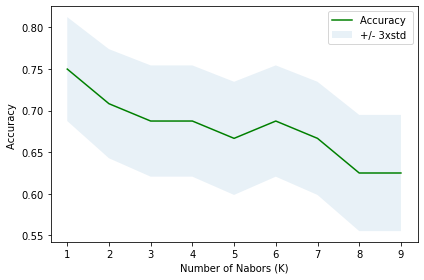

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Above we see a plot that gives us the accuracies of different levels of K with our KNN algorithm. We see the accuracy of our model decreases as we increase the value of K. Using a value of 1 is not practical, but we see that K=6 seems to be the ideal value. Our initial value of 5 was relatively accurate compared to other values. This plot is very useful when we are looking to optimize our algorithm.     